In [2]:
import pandas as pd
with open("sfm_sift/points3D.txt") as f:
    points3D = f.read().splitlines() 

In [3]:
from tqdm import tqdm
# captture nodes in 2 separate lists
POINT3D_ID = []
X = []
Y = []
Z = []
R = []
G = []
B = []
Error = []
TRACK = []
Image_ID = []
POINT2D_IDX = []


for i in tqdm(points3D):
  POINT3D_ID.append(i.split(' ')[0])
  X.append(i.split(' ')[1])
  Y.append(i.split(' ')[2])
  Z.append(i.split(' ')[3])
  R.append(i.split(' ')[4])
  G.append(i.split(' ')[5])
  B.append(i.split(' ')[6])
  Error.append(i.split(' ')[7])
  TRACK.append(i.split(' ')[8])
  Image_ID.append(i.split(' ')[9])
  POINT2D_IDX.append(i.split(' ')[10:-1])#이거 다시 설정하기.

#df_points3D = pd.DataFrame({'POINT3D_ID': POINT3D_ID,'X': X, 'Y': X, 'Z' : Z,'R': R, 'G': G, 'B' : B,'Error': Error, 'TRACK': TRACK, 'Image_ID' : Image_ID,'POINT2D_IDX' : POINT2D_IDX})

100%|██████████| 1310012/1310012 [00:16<00:00, 78606.16it/s] 


In [4]:
from tqdm import tqdm
# captture nodes in 2 separate lists
X = []
Y = []
Z = []

for i in tqdm(points3D):
  X.append(i.split(' ')[1])
  Y.append(i.split(' ')[2])
  Z.append(i.split(' ')[3])

df_points3D = pd.DataFrame({'X': X, 'Y': X, 'Z' : Z})

100%|██████████| 1310012/1310012 [00:02<00:00, 439039.64it/s]


In [5]:
for i in range(0, len(X)):
    X[i] = float(X[i])
for i in range(0, len(Y)):
    Y[i] = float(Y[i])
for i in range(0, len(Z)):
    Z[i] = float(Z[i])

100%|██████████| 19/19 [19:31<00:00, 61.67s/it]


total_count :  2052
real_count :  131


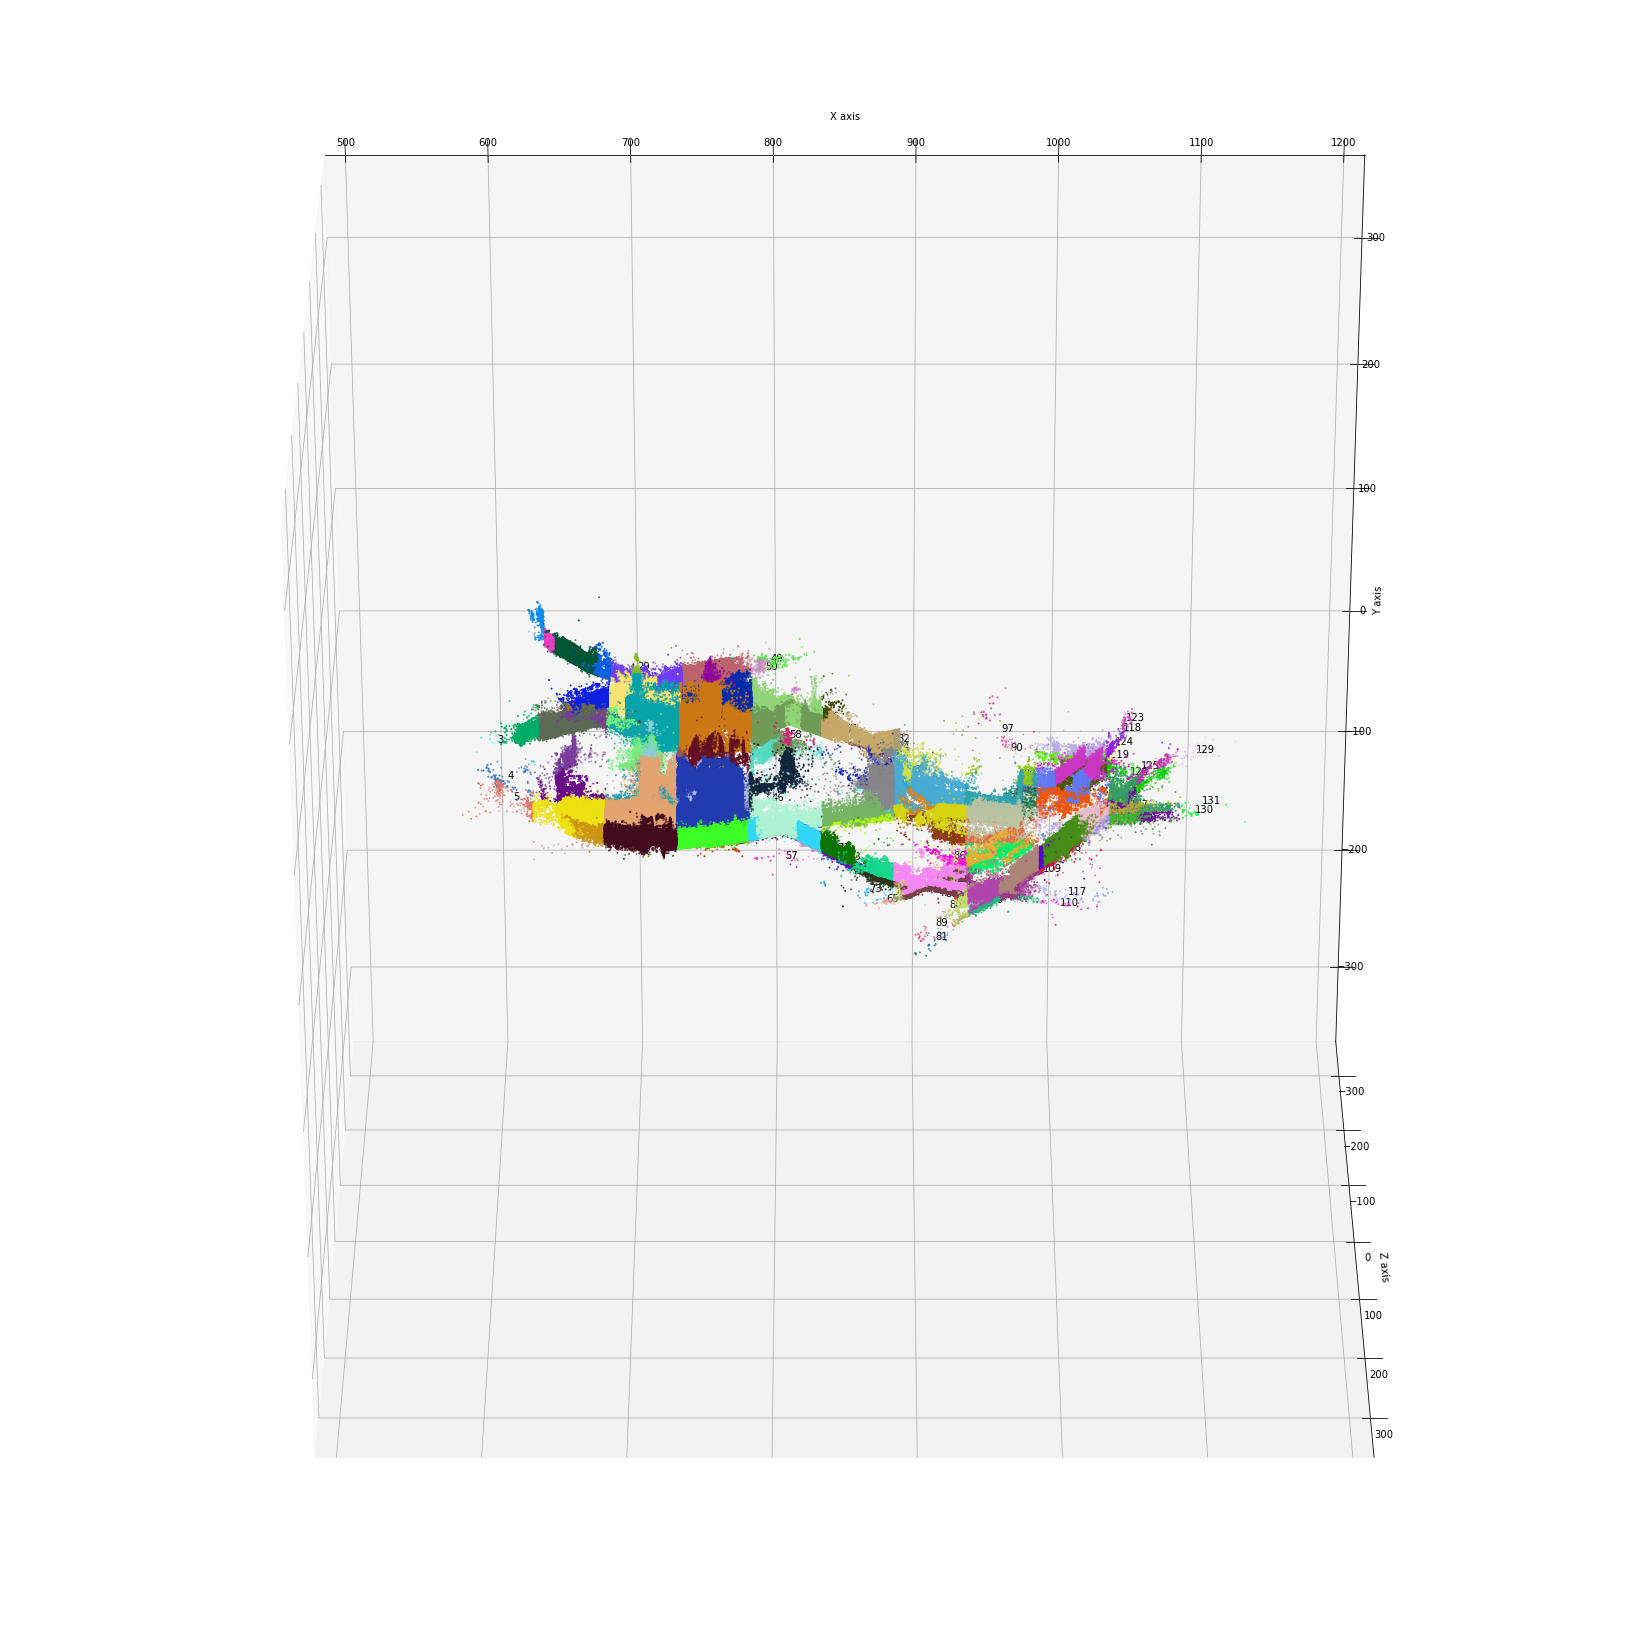

In [6]:
def mean(num):
    return sum(num)/len(num)

#필요한 라이브러리 임포트 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython.display import HTML
from matplotlib import animation

pair=[]
#X,Y,Z좌표를 하나의 리스트안에 담기위해 temp에 저장한뒤에 이것을 pair 리스트에 담는다.
for i in range(0,len(X)):
    tmp=(X[i],Y[i],Z[i])
    pair.append(tmp)
#visualize할 사이즈는 30 by 30이며, 3D로 볼것을 선언한다. 
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax = plt.axes(projection='3d')

VoxelID=[]
total_count=0 #빈 복셀도 포함한 전체 연산하는 복셀의 
real_count=0 #실제 값이 10개이상있는 복셀들 수 
interval=50 #복셀들간의 간격 여기서는 하나의 복셀의 크기가 interval^3의 크기가 된다.
for i in tqdm(range(int(min(X)-1),int(max(X))+1,interval)):#X좌표 최솟값부터 최댓값까지 interval 간격으로 for문을 돈다.
    for j in range(int(min(Y)-1),int(max(Y))+1,interval):#Y좌표 최솟값부터 최댓값까지 interval 간격으로 for문을 돈다.
        for k in range(int(min(Z)-1),int(max(Z))+1,interval):#Z좌표 최솟값부터 최댓값까지 interval 간격으로 for문을 돈다.
            #임시적으로 저장할 x2,y2,z2를 선언한다. 실제 여기에 담긴 값이 scatter된다.
            x2=[]
            y2=[]
            z2=[]
            for x,y,z in pair:#3D point가 담긴 pair에서 x,y,z값을 분리하여 for문을 돈다.
                if (x>i)&(x<i+interval)&(y>j)&(y<j+interval)&(z>k)&(z<k+interval):#각각의 x,y,z좌표가 interval 범위안에 들면 x2,y2,z2에 담는다. 여기에 담긴것이 하나의 쌍이된다.
                  x2.append(x)
                  y2.append(y)
                  z2.append(z)
            total_count=total_count+1      
            if len(x2) >=10:#복셀안에 3D point가 10개 이상인것만 scatter한다. 그 미만은 noise라고 보는것.
                real_count=real_count+1 #실제 복셀값 카운트      
                ax.scatter(x2, y2,z2,s=1, c=np.random.rand(3,))#같은 복셀안에있는 값은 같은 색상으로 한다. 여기가 indexing해주는 부분이다. 
                ax.text(mean(x2),mean(y2),mean(z2),  '%s' % (str(real_count)), size=10, zorder=1,  color='k') #각 복셀에 3D point의 평균 좌표값에다가 해당 voxel index를 같이 표기해준다.
                for l in range(0,len(x2)):
                    VoxelID.append(real_count)
                    #print(real_count)       
            else:
                for l in range(0,len(x2)):
                    VoxelID.append(0)
                    #print(0)       
print('total_count : ',total_count)
print('real_count : ',real_count)

#size 700 by 700 by 700으로 정사각형 박스안에 그려준다. 정사각형이 되지않으면 그림이 찌그러지기 때문이다. 
ax.set_xlim(500,1200)
ax.set_ylim(-350,350)
ax.set_zlim(-350,350)
# X,Y,Z축 표시 
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

#좀더 가독성을 위해 위아래 120도 평면상으로 -90도였을 때 가장 보기 좋다. 
ax.view_init(elev=120, azim=-90)
plt.show()


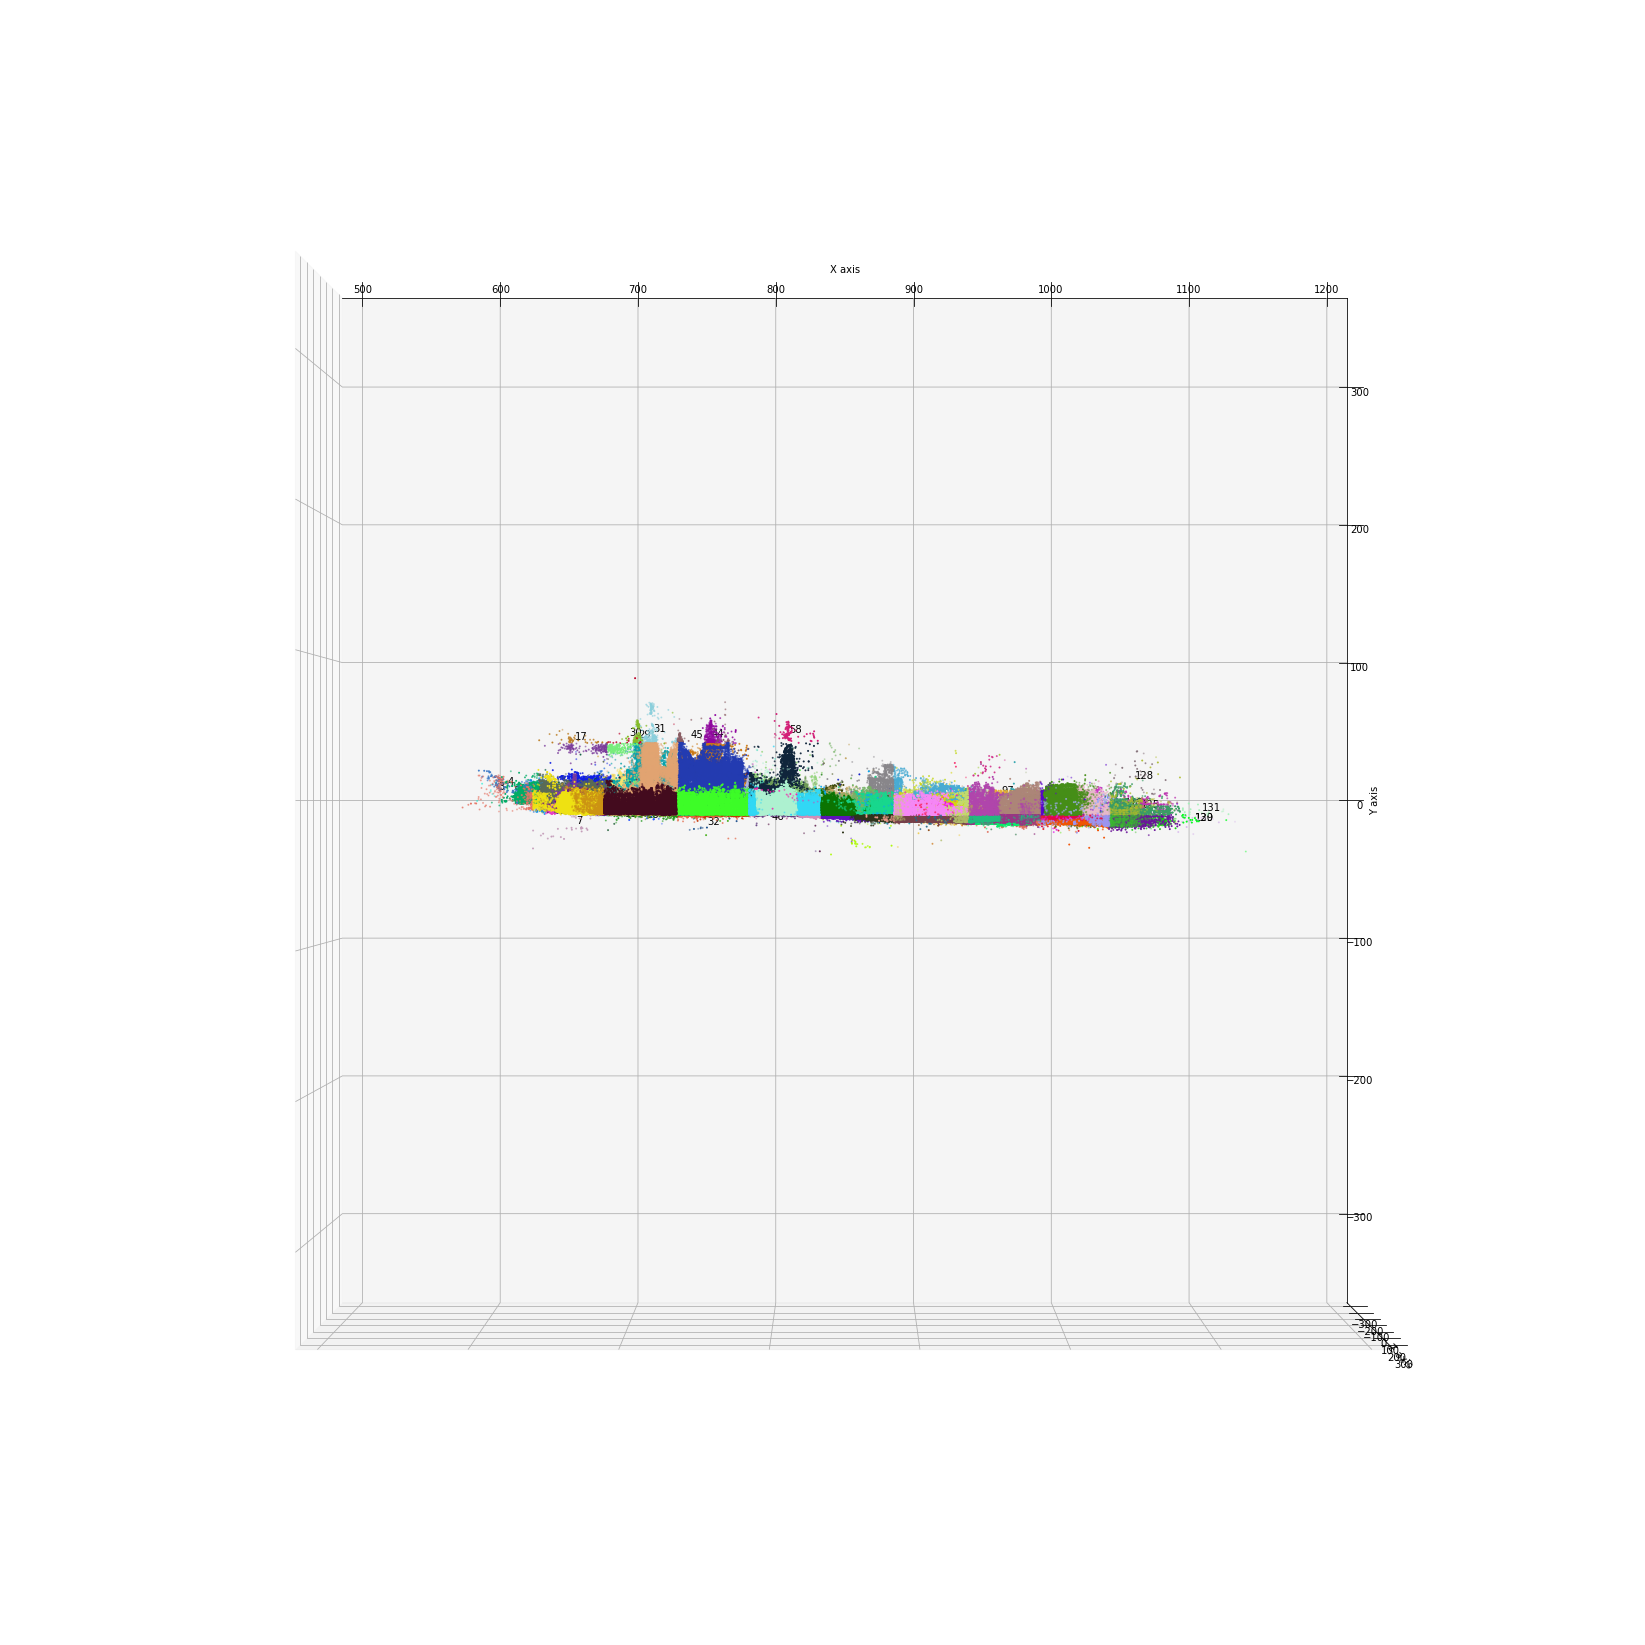

In [7]:
ax.view_init(elev=90, azim=-90)
fig

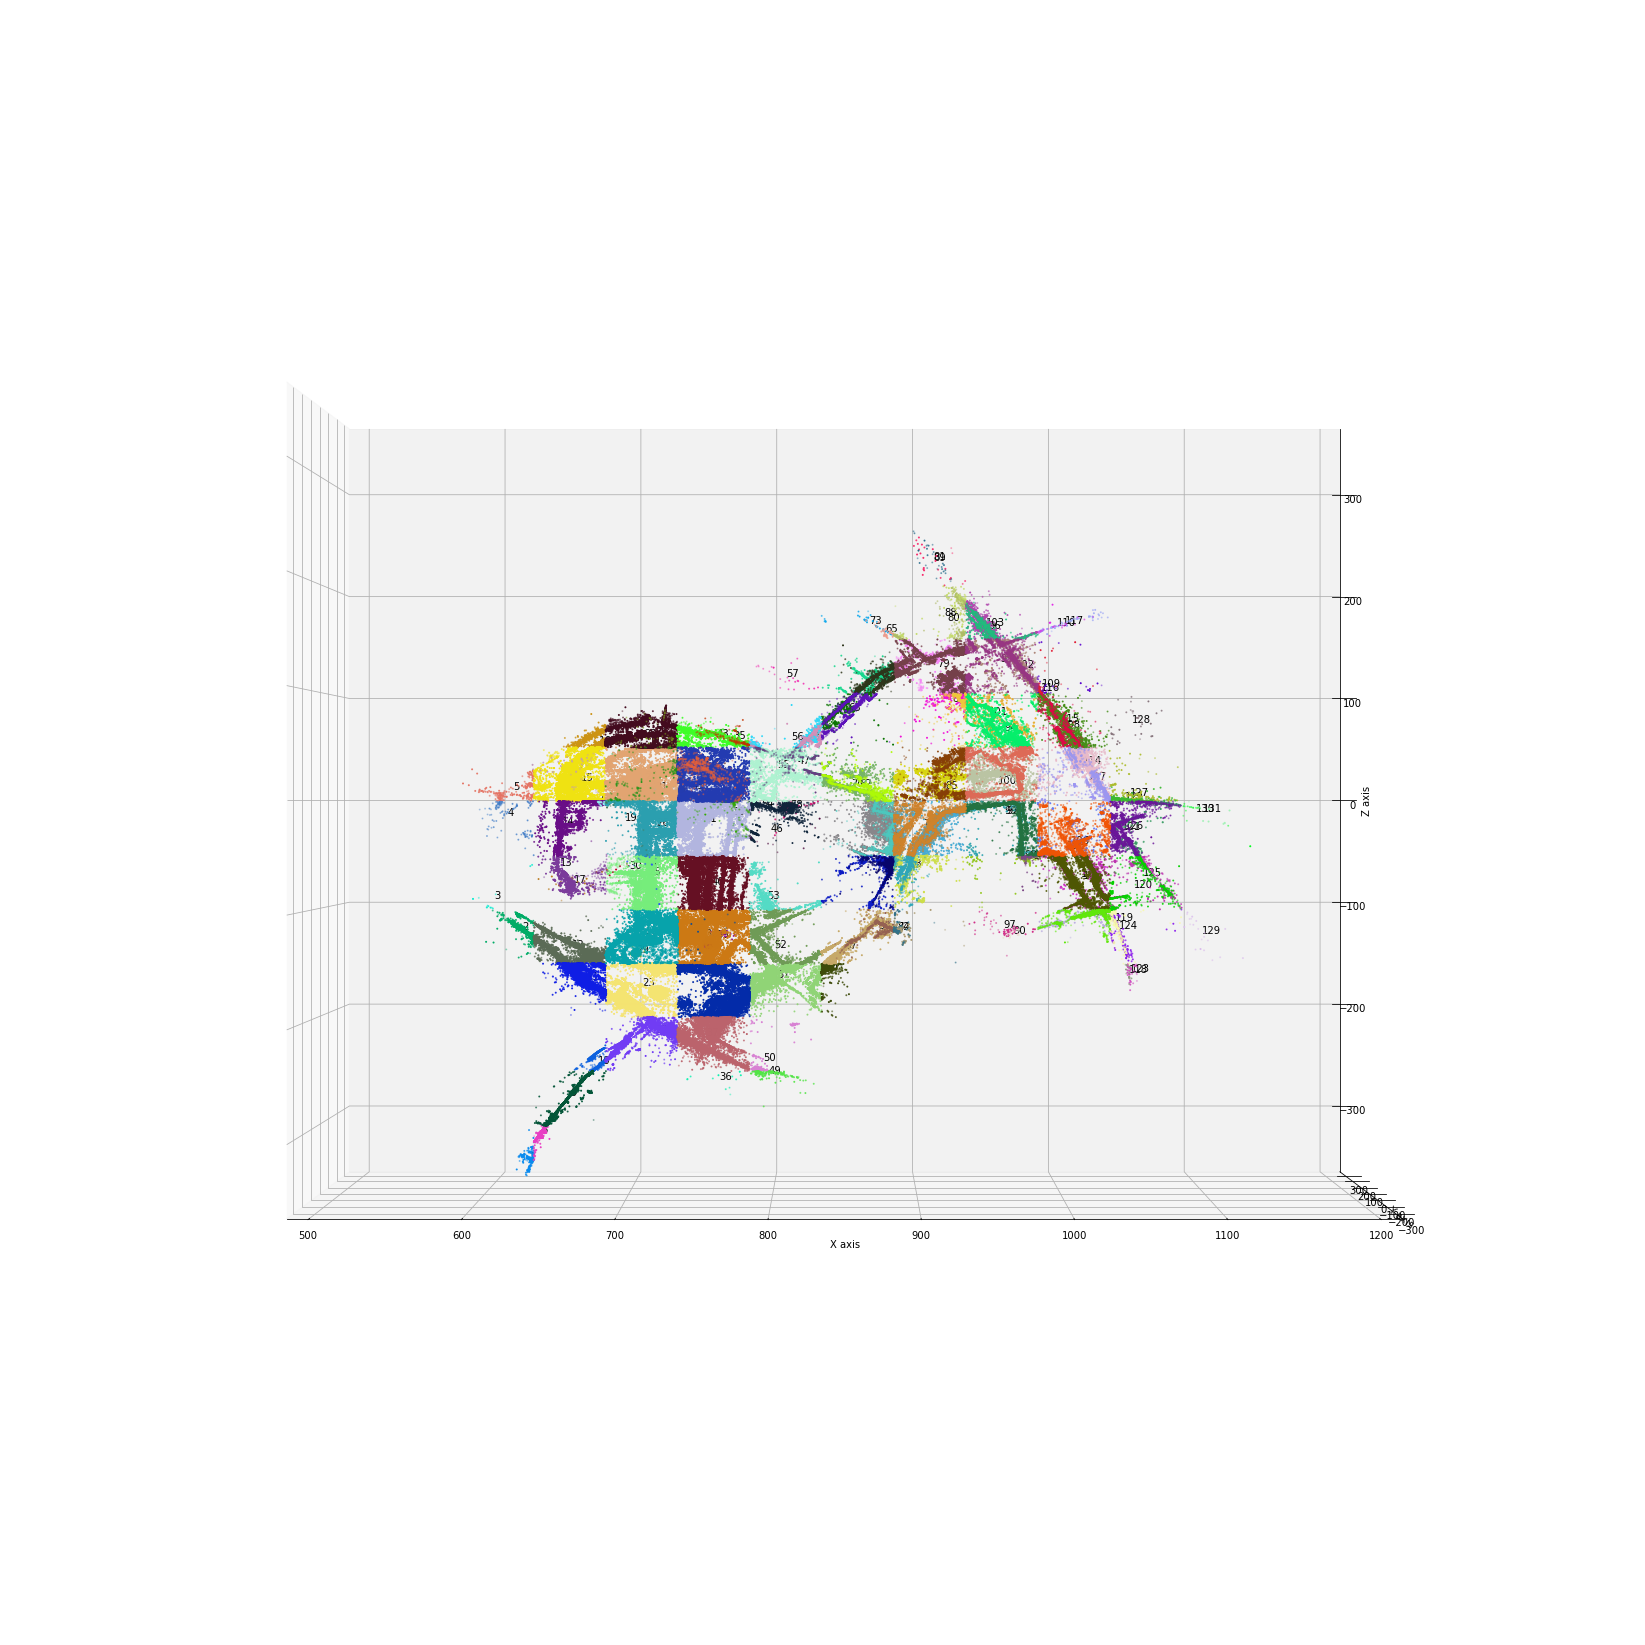

In [8]:
ax.view_init(elev=0, azim=-90)
fig

In [9]:
from pathlib import Path
from pprint import pformat

import cv2
import math
import time
import numpy as np
import pycolmap

from hloc import extract_features, match_features, pairs_from_covisibility
from hloc import colmap_from_nvm, triangulation, localize_sfm, visualization

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pickle
from tqdm import tqdm

import copy
from transforms3d.quaternions import quat2mat, mat2quat

import torch

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
# bandwidth의 적정값을 estimate_bandwidth함수로 출력 가능
from sklearn.cluster import estimate_bandwidth

import struct
import os
import collections

In [10]:
BaseImage = collections.namedtuple(
    "Image", ["id", "qvec", "tvec", "camera_id", "name", "xys", "point3D_ids"])

VoxelImage = collections.namedtuple(
    "Image", ["id", "qvec", "tvec", "name", "xys", "point3D_ids", "xyzs", "voxelIDs"])

VoxelHisto = collections.namedtuple(
    "Hist", ["voxels", "voxels_hist", "each_voxel_num"])

CameraModel = collections.namedtuple(
    "CameraModel", ["model_id", "model_name", "num_params"])
Camera = collections.namedtuple(
    "Camera", ["id", "model", "width", "height", "params"])
Point3D = collections.namedtuple(
    "Point3D", ["id", "xyz", "rgb", "error", "image_ids", "point2D_idxs"])

In [11]:
def read_images_text(path):
    """
    see: src/base/reconstruction.cc
        void Reconstruction::ReadImagesText(const std::string& path)
        void Reconstruction::WriteImagesText(const std::string& path)
    """
    images = {}
    with open(path, "r") as fid:
        while True:
            line = fid.readline()
            if not line:
                break
            line = line.strip()
            if len(line) > 0 and line[0] != "#":
                elems = line.split()
                image_id = int(elems[0])
                qvec = np.array(tuple(map(float, elems[1:5])))
                tvec = np.array(tuple(map(float, elems[5:8])))
                camera_id = int(elems[8])
                image_name = elems[9]
                elems = fid.readline().split()
                xys = np.column_stack([tuple(map(float, elems[0::3])),
                                       tuple(map(float, elems[1::3]))])
                point3D_ids = np.array(tuple(map(int, elems[2::3])))
                images[image_id] = Image(
                    id=image_id, qvec=qvec, tvec=tvec,
                    camera_id=camera_id, name=image_name,
                    xys=xys, point3D_ids=point3D_ids)
    return images

In [12]:
class Image(BaseImage):
    def qvec2rotmat(self):
        return qvec2rotmat(self.qvec)

In [13]:
def qvec2rotmat(qvec):
    return np.array([
        [1 - 2 * qvec[2] ** 2 - 2 * qvec[3] ** 2,
         2 * qvec[1] * qvec[2] - 2 * qvec[0] * qvec[3],
         2 * qvec[3] * qvec[1] + 2 * qvec[0] * qvec[2]],
        [2 * qvec[1] * qvec[2] + 2 * qvec[0] * qvec[3],
         1 - 2 * qvec[1] ** 2 - 2 * qvec[3] ** 2,
         2 * qvec[2] * qvec[3] - 2 * qvec[0] * qvec[1]],
        [2 * qvec[3] * qvec[1] - 2 * qvec[0] * qvec[2],
         2 * qvec[2] * qvec[3] + 2 * qvec[0] * qvec[1],
         1 - 2 * qvec[1] ** 2 - 2 * qvec[2] ** 2]])


In [14]:
def read_cameras_text(path):
    """
    see: src/base/reconstruction.cc
        void Reconstruction::WriteCamerasText(const std::string& path)
        void Reconstruction::ReadCamerasText(const std::string& path)
    """
    cameras = {}
    with open(path, "r") as fid:
        while True:
            line = fid.readline()
            if not line:
                break
            line = line.strip()
            if len(line) > 0 and line[0] != "#":
                elems = line.split()
                camera_id = int(elems[0])
                model = elems[1]
                width = int(elems[2])
                height = int(elems[3])
                params = np.array(tuple(map(float, elems[4:])))
                cameras[camera_id] = Camera(id=camera_id, model=model,
                                            width=width, height=height,
                                            params=params)
    return cameras

In [16]:
def read_points3D_text(path):
    """
    see: src/base/reconstruction.cc
        void Reconstruction::ReadPoints3DText(const std::string& path)
        void Reconstruction::WritePoints3DText(const std::string& path)
    """
    points3D = {}
    with open(path, "r") as fid:
        while True:
            line = fid.readline()
            if not line:
                break
            line = line.strip()
            if len(line) > 0 and line[0] != "#":
                elems = line.split()
                point3D_id = int(elems[0])
                xyz = np.array(tuple(map(float, elems[1:4])))
                rgb = np.array(tuple(map(int, elems[4:7])))
                error = float(elems[7])
                image_ids = np.array(tuple(map(int, elems[8::2])))
                point2D_idxs = np.array(tuple(map(int, elems[9::2])))
                points3D[point3D_id] = Point3D(id=point3D_id, xyz=xyz, rgb=rgb,
                                               error=error, image_ids=image_ids,
                                               point2D_idxs=point2D_idxs)
    return points3D

In [17]:
def abs2relapose(c1, c2, q1, q2):
    """Calculate relative pose between two cameras
    Args:
    - c1: absolute position of the first camera
    - c2: absolute position of the second camera
    - q1: orientation quaternion of the first camera
    - q2: orientation quaternion of the second camera
    Return:
    - (t12, q12): relative pose giving the transformation from the 1st camera to the 2nd camera coordinates,
                  t12 is translation, q12 is relative rotation quaternion
    """
    r1 = quat2mat(q1)
    r2 = quat2mat(q2)
    r12 = r2.dot(r1.T)
    q12 = mat2quat(r12)
    t12 = r2.dot(c1 - c2)
    return (t12, q12)

In [18]:
def cal_vec_angle_error(label, pred, eps=1e-14):
    if len(label.shape) == 1:
        label = np.expand_dims(label, axis=0)
    if len(pred.shape) == 1:
        pred = np.expand_dims(pred, axis=0)

    v1 = pred / (np.linalg.norm(pred, axis=1, keepdims=True) + eps)
    v2 = label / (np.linalg.norm(label, axis=1, keepdims=True) + eps)
    d = np.sum(np.multiply(v1, v2), axis=1, keepdims=True)
    d = np.clip(d, a_min=-1, a_max=1)
    error = np.degrees(np.arccos(d))
    return error.squeeze()


def cal_quat_angle_error(label, pred, eps=1e-14):
    if len(label.shape) == 1:
        label = np.expand_dims(label, axis=0)
    if len(pred.shape) == 1:
        pred = np.expand_dims(pred, axis=0)
    q1 = pred / (np.linalg.norm(pred, axis=1, keepdims=True) + eps)
    q2 = label / (np.linalg.norm(label, axis=1, keepdims=True) + eps)
    d = np.abs(np.sum(np.multiply(q1, q2), axis=1, keepdims=True))
    d = np.clip(d, a_min=-1, a_max=1)
    error = 2 * np.degrees(np.arccos(d))
    return error.squeeze()

In [19]:
images=read_images_text("images.txt")
points3D=read_points3D_text("points3D.txt")
cameras=read_cameras_text("cameras.txt")

In [20]:
images[630].name

'db/1565.jpg'

1565번 이미지로부터 추출된 3D point 담기 

In [21]:
a=images[630].point3D_ids
a=list(a)
b=[]
for i in a:
    if i!=-1:
        b.append(i)

In [22]:
print(len(b))

1833


In [23]:
for i in range(0, len(POINT3D_ID)):
    POINT3D_ID[i] = int(POINT3D_ID[i])
for i in range(0, len(VoxelID)):
    VoxelID[i] = int(VoxelID[i])

전체 3D point에 대응하는 복셀을 짝꿍으로정리 

In [24]:
myEdges = pd.DataFrame({'POINT3D_ID': POINT3D_ID,'VoxelID':VoxelID})
myEdges=myEdges.sort_values(by=['VoxelID'] ,ascending=True)
lst_myEdges=(myEdges.to_numpy()).tolist()
lst_myEdges

[[2011141, 0],
 [840186, 0],
 [840185, 0],
 [840184, 0],
 [840182, 0],
 [839452, 0],
 [839451, 0],
 [839450, 0],
 [1447151, 0],
 [589146, 0],
 [591012, 0],
 [591013, 0],
 [591014, 0],
 [591015, 0],
 [591017, 0],
 [591018, 0],
 [591019, 0],
 [591033, 0],
 [591034, 0],
 [591035, 0],
 [591038, 0],
 [591041, 0],
 [591505, 0],
 [591507, 0],
 [591508, 0],
 [591510, 0],
 [592133, 0],
 [592134, 0],
 [1775747, 0],
 [1775748, 0],
 [840188, 0],
 [1775749, 0],
 [840189, 0],
 [840423, 0],
 [1060337, 0],
 [1060189, 0],
 [1060188, 0],
 [1060187, 0],
 [1060186, 0],
 [842554, 0],
 [842550, 0],
 [842547, 0],
 [842546, 0],
 [842542, 0],
 [842540, 0],
 [842539, 0],
 [842538, 0],
 [842537, 0],
 [842535, 0],
 [842531, 0],
 [840438, 0],
 [840437, 0],
 [840436, 0],
 [840435, 0],
 [840434, 0],
 [840433, 0],
 [840432, 0],
 [840431, 0],
 [840430, 0],
 [840428, 0],
 [840427, 0],
 [840426, 0],
 [840424, 0],
 [840190, 0],
 [1775751, 0],
 [1775752, 0],
 [1775753, 0],
 [1776242, 0],
 [1776243, 0],
 [1776244, 0],
 [17

In [25]:
len(lst_myEdges)

1310012

위 리스트를 펴준뒤에 dictionary 형태로 변환해주는 작업 

In [26]:
from itertools import chain
flatten_lst_myEdges = list(chain.from_iterable(lst_myEdges))
 
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct
dic_edges={}       
# Driver code
dic_edges=Convert(flatten_lst_myEdges)

이미지 1565번에 담긴 voxel 정리 

In [27]:
img1565=[]
for i in b:
    img1565.append(dic_edges[i])
img1565=np.array(img1565)
#img1565=np.unique(img1565)
#img1565=img1565.tolist()

In [28]:
import pandas as pd
df_img1565=pd.DataFrame(img1565)

3D point가 100개 이상있는 복셀만 그 이미지의 복셀로 인정한다. 

In [29]:
cv_df_img1565=df_img1565.value_counts()

In [30]:
cv_df_img1565[cv_df_img1565>100]

42     425
102    261
77     216
12     187
15     158
26     115
105    109
dtype: int64

In [31]:
len(img1565)

1833

Reprojection 시키기 

실제 2D x좌표 :  238
실제 2D y좌표 :  13
3D 좌표 :  654.3198903452636 0.8747794906085872 -6.729020034128951
재사영된 2D x좌표 :  240
재사영된 2D y좌표 :  14
Reprojection Error : 2.23606797749979
실제 2D x좌표 :  216
실제 2D y좌표 :  16
3D 좌표 :  654.2167848147199 0.7213075309877466 -6.887191050063281
재사영된 2D x좌표 :  216
재사영된 2D y좌표 :  18
Reprojection Error : 2.0
실제 2D x좌표 :  357
실제 2D y좌표 :  16
3D 좌표 :  654.103532909034 0.9575996820505055 -5.773038171762648
재사영된 2D x좌표 :  356
재사영된 2D y좌표 :  17
Reprojection Error : 1.4142135623730951
실제 2D x좌표 :  46
실제 2D y좌표 :  17
3D 좌표 :  654.1636427885716 0.3814454252321594 -8.139207026737255
재사영된 2D x좌표 :  46
재사영된 2D y좌표 :  16
Reprojection Error : 1.0
실제 2D x좌표 :  260
실제 2D y좌표 :  19
3D 좌표 :  654.2382062661734 0.8066287331358941 -6.55332991168862
재사영된 2D x좌표 :  260
재사영된 2D y좌표 :  20
Reprojection Error : 1.0
실제 2D x좌표 :  346
실제 2D y좌표 :  24
3D 좌표 :  654.1224701746302 0.8929319018708886 -5.827323531994096
재사영된 2D x좌표 :  349
재사영된 2D y좌표 :  23
Reprojection Error : 3.1622776601683795
실

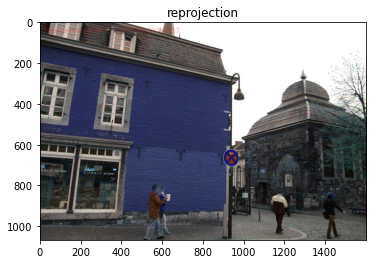

In [32]:
import cv2
import numpy as np
import collections
from pathlib import Path

# hloc_images = read_images_text('images.txt')
# hloc_points3Ds = read_points3D_text('points3D.txt')
# hloc_cameras = read_cameras_text('cameras.txt')
hloc_images=images
hloc_points3Ds=points3D
hloc_cameras=cameras
keys = [630]

for i in range(len(keys)):
    key = keys[i]
    tar_img = hloc_images[key]
    tar_cameras = hloc_cameras[key]
    tar_camera_header = [tar_cameras.id, tar_cameras.width, tar_cameras.height, *tar_cameras.params]
    tar_image_header = [tar_img.id, *tar_img.qvec, *tar_img.tvec, tar_img.camera_id, tar_img.name]
    tar_points_strings = []

    for xy, point3D_id in zip(tar_img.xys, tar_img.point3D_ids):
        if(point3D_id == -1):
            continue
        tar_points_strings.append(" ".join(map(str, [*xy, point3D_id])))

    image_dir =Path('/home/kangjunekoo/DeepLearning_Data/Aachen-Day-Night_dataset/images/images_upright/')
    path = image_dir / tar_image_header[9]
    image = cv2.imread(str(path))

    tar_pt_3ds = []
    mean_error=0
    for str_points in tar_points_strings:
        list_str = str_points.split(" ")
        tmp1 = float(list_str[0])
        tmp2 = float(list_str[1])
        point3D_id = int(list_str[2])
        tar_3dPt = hloc_points3Ds[point3D_id]
        tar_pt_3ds.append(tar_3dPt.xyz)
        print("실제 2D x좌표 : ",int(tmp1))
        print("실제 2D y좌표 : ",int(tmp2))

        image=cv2.circle(image, (int(tmp1), int(tmp2)), 1, (0,255,0), -1)
        tar_quat = np.array(tar_image_header[1:5])
        rvec=qvec2rotmat(tar_quat)
        tar_trans = np.array(tar_image_header[5:8])

        camera_metrix = np.zeros((3, 3), dtype='float32')
        camera_metrix[0, 0] = tar_camera_header[3]
        camera_metrix[1, 1] = tar_camera_header[3]
        camera_metrix[0, 2] = tar_camera_header[4]
        camera_metrix[1, 2] = tar_camera_header[5]
        camera_metrix[2, 2] = 1
        distort=tar_camera_header[6]


        imgpoints2, _ = cv2.projectPoints(tar_3dPt.xyz, rvec, tar_trans, camera_metrix, distort)
        imgpoints2 = np.concatenate(imgpoints2).tolist()
        imgpoints2 = np.concatenate(imgpoints2).tolist()

        tmp3 = float(imgpoints2[0])
        tmp4 = float(imgpoints2[1])

        print("3D 좌표 : ", *tar_3dPt.xyz)
        print("재사영된 2D x좌표 : ",int(tmp3))
        print("재사영된 2D y좌표 : ",int(tmp4))

        image = cv2.circle(image, (int(tmp3), int(tmp4)), 1, (0, 0, 255), -1)
        error=cv2.norm((int(tmp1), int(tmp2)),(int(tmp3), int(tmp4)),cv2.NORM_L2)
        print("Reprojection Error :",error)
        mean_error+=error

    mean_error=(mean_error)/float(len(tar_pt_3ds))
    mean_error = str(mean_error)
    image = cv2.putText(image,"Reprojection Error :"+mean_error, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
    plt.imshow(image),plt.title('reprojection')
    #cv2.imshow('image', image)
    #cv2.waitKey(0)

In [ ]:
cv2.imshow('image', image)
cv2.waitKey(0)